Arshdeep Singh (991502864)

In [ ]:
import pycaret
pycaret.__version__


'3.3.2'

In [ ]:
import pandas as pd
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the White wine quality data set
data = pd.read_csv('winequality-white.csv', delimiter=';')

#Displaying basic info
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


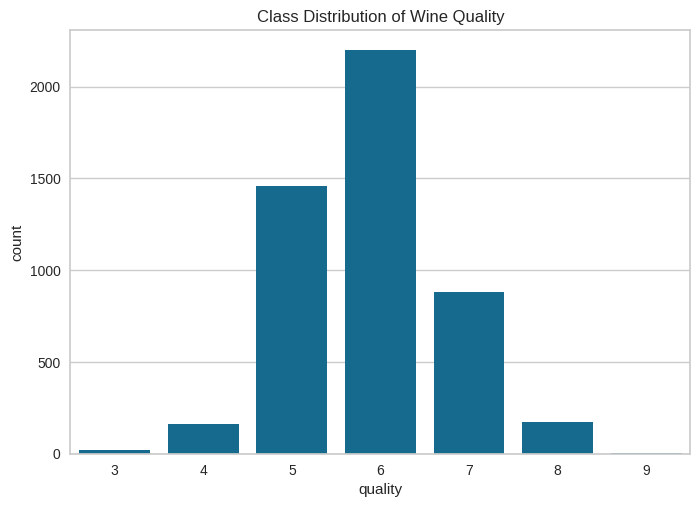

In [ ]:
# Check class distribution of 'quality' column
sns.countplot(x='quality', data=data)
plt.title('Class Distribution of Wine Quality')
plt.show()

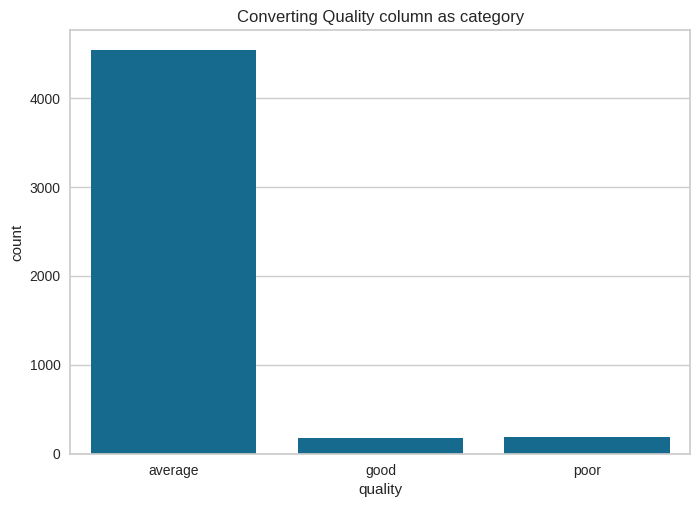

In [ ]:
#Converting the 'quality' column to considered as categories
data['quality'] = data['quality'].apply(lambda x: 'poor' if x <= 4 else ('average' if x <= 7 else 'good'))

#checking the new distribution
sns.countplot(x='quality', data=data)
plt.title('Converting Quality column as category')
plt.show()

In [ ]:
#Setting up the pycaret function
clf = setup(data=data, target='quality', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"average: 0, good: 1, poor: 2"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


Compare Models

In [ ]:
# Comparing the models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9370,0.8157,0.9370,0.9227,0.9176,0.2947,0.3677,0.6780
et,Extra Trees Classifier,0.9358,0.8602,0.9358,0.9176,0.9148,0.2704,0.3530,0.5290
catboost,CatBoost Classifier,0.9347,0.8017,0.9347,0.9259,0.9159,0.2840,0.3524,7.2820
lightgbm,Light Gradient Boosting Machine,0.9341,0.7973,0.9341,0.9204,0.9171,0.3058,0.3650,1.3230
xgboost,Extreme Gradient Boosting,0.9338,0.7958,0.9338,0.9229,0.9173,0.3028,0.3543,0.3710
gbc,Gradient Boosting Classifier,0.9268,0.0000,0.9268,0.9069,0.9063,0.2008,0.2545,2.3600
lr,Logistic Regression,0.9262,0.0000,0.9262,0.8772,0.8945,0.0555,0.1141,0.7820
svm,SVM - Linear Kernel,0.9259,0.0000,0.9259,0.8647,0.8918,0.0197,0.0422,0.0870
ridge,Ridge Classifier,0.9259,0.0000,0.9259,0.8573,0.8903,0.0000,0.0000,0.0540
dummy,Dummy Classifier,0.9259,0.5000,0.9259,0.8573,0.8903,0.0000,0.0000,0.0790


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# Comparing the models using OOP
clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9370,0.8157,0.9370,0.9227,0.9176,0.2947,0.3677,0.9990
et,Extra Trees Classifier,0.9358,0.8602,0.9358,0.9176,0.9148,0.2704,0.3530,0.4610
catboost,CatBoost Classifier,0.9347,0.8017,0.9347,0.9259,0.9159,0.2840,0.3524,7.4230
lightgbm,Light Gradient Boosting Machine,0.9341,0.7973,0.9341,0.9204,0.9171,0.3058,0.3650,1.4410
xgboost,Extreme Gradient Boosting,0.9338,0.7958,0.9338,0.9229,0.9173,0.3028,0.3543,0.4770
gbc,Gradient Boosting Classifier,0.9268,0.0000,0.9268,0.9069,0.9063,0.2008,0.2545,1.9340
lr,Logistic Regression,0.9262,0.0000,0.9262,0.8772,0.8945,0.0555,0.1141,0.1570
svm,SVM - Linear Kernel,0.9259,0.0000,0.9259,0.8647,0.8918,0.0197,0.0422,0.0840
ridge,Ridge Classifier,0.9259,0.0000,0.9259,0.8573,0.8903,0.0000,0.0000,0.0530
dummy,Dummy Classifier,0.9259,0.5000,0.9259,0.8573,0.8903,0.0000,0.0000,0.0510


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

 Analyze the best Model

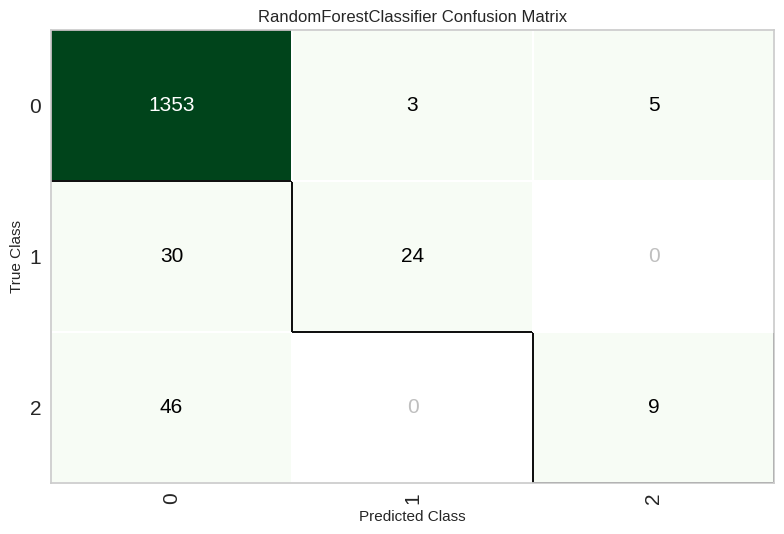

In [ ]:
# Plot the confusion matrix for the better model
plot_model(best_model, plot='confusion_matrix')

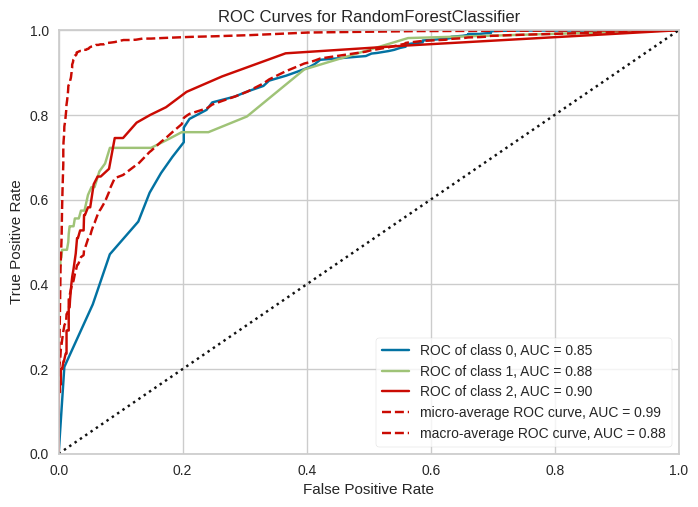

In [ ]:
# plot AUC
plot_model(best_model, plot='auc')

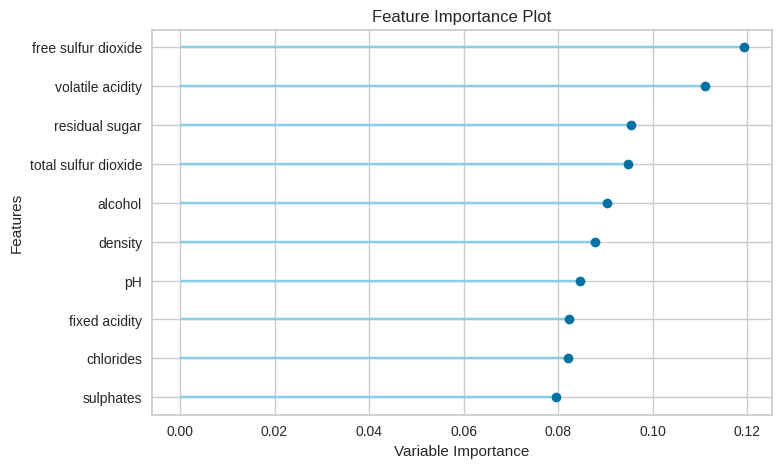

In [ ]:
# plot feature importnace
plot_model(best_model, plot='feature')

Prediction


In [ ]:
predictions = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9429,0.8559,0.9429,0.9333,0.9295,0.4225,0.4781


In [ ]:
# Showing prediction data
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
242,7.1,0.21,0.37,2.4,0.026,23.0,100.0,0.99030,3.15,0.38,11.4,average,average,1.00
4805,5.1,0.26,0.34,6.4,0.034,26.0,99.0,0.99449,3.23,0.41,9.2,average,average,0.95
744,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10.0,average,average,0.99
2592,7.3,0.32,0.29,1.5,0.038,32.0,144.0,0.99296,3.20,0.55,10.8,average,average,1.00
3901,4.8,0.65,0.12,1.1,0.013,4.0,10.0,0.99246,3.32,0.36,13.5,poor,average,0.53


Saving and Deploying the model

In [ ]:
from hashlib import new
# Copying data and droping the class
new_data = data.copy()
new_data.drop('quality', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [ ]:
#Prediction on the new data
new_predictions = predict_model(best_model, data=new_data)
new_predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction_label,prediction_score
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,average,0.99
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,average,0.98
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,average,0.96
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,average,0.99
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,average,0.99


In [ ]:
# Saving the pipeline
save_model(best_model, 'white-wine-quality-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

In [ ]:
# Loading the pipeline
loaded_white_wine_model = load_model('white-wine-quality-model')
loaded_white_wine_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

The detailed functions are below


In [ ]:
clf = setup(data, target='quality', session_id=123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"average: 0, good: 1, poor: 2"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


In [ ]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
# Accessing the X_train_transformed
get_config('X_train_transformed')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3098,5.1,0.33,0.27,6.700000,0.022,44.0,129.0,0.99221,3.36,0.39,11.0
4713,6.4,0.28,0.28,3.000000,0.040,19.0,98.0,0.99216,3.25,0.47,11.1
2019,6.6,0.32,0.22,16.700001,0.046,38.0,133.0,0.99790,3.22,0.67,10.4
1973,7.5,0.26,0.26,18.350000,0.084,33.0,139.0,1.00110,3.17,0.39,8.8
4442,6.7,0.34,0.31,16.400000,0.051,20.0,146.0,0.99834,3.06,0.54,9.1
...,...,...,...,...,...,...,...,...,...,...,...
4853,5.2,0.25,0.23,1.400000,0.047,20.0,77.0,0.99001,3.32,0.62,11.4
1376,6.9,0.27,0.41,1.700000,0.047,6.0,134.0,0.99290,3.15,0.69,11.4
2024,8.0,0.43,0.40,12.400000,0.168,29.0,190.0,0.99910,3.07,0.64,9.2
1967,8.0,0.23,0.35,9.200000,0.044,53.0,186.0,0.99700,3.09,0.56,9.5


In [ ]:
# Accessing the seed

print("Seed value: {}".format(get_config('seed')) )

# Updating the seed value
set_config('seed', 786)
print("New seed value: {}" .format(get_config('seed')))



Seed value: 123
New seed value: 786


In [ ]:
# Setting up the model with normalize_menthod
clf = setup(data, target='quality', session_id=123, normalize=True, normalize_method='minmax')

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"average: 0, good: 1, poor: 2"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


<Axes: >

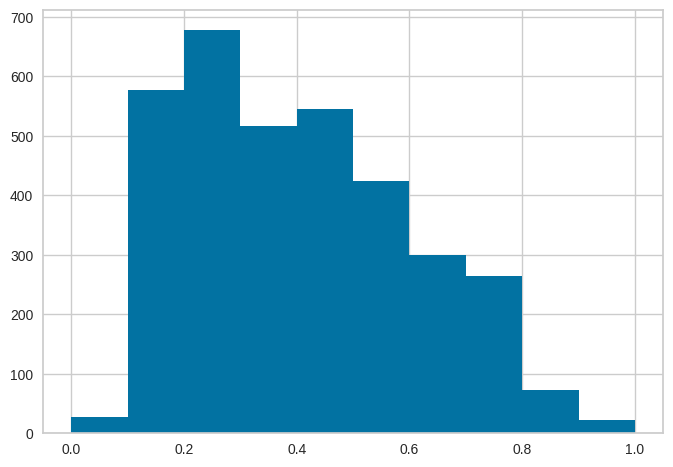

In [ ]:
# Plotting the X_train_transformed on the quality
get_config('X_train_transformed')['alcohol'].hist()

<Axes: >

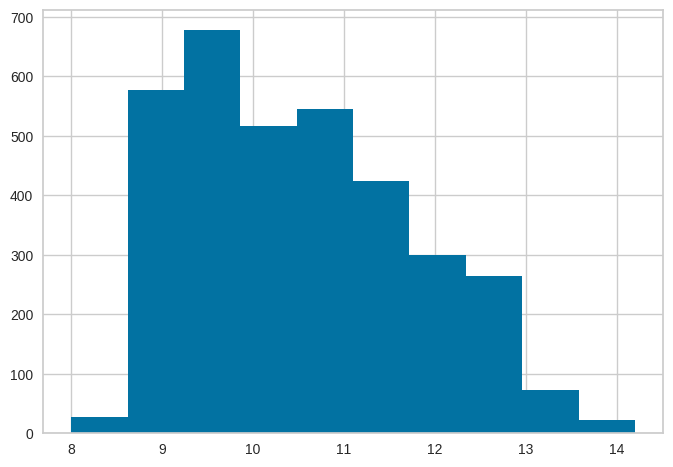

In [ ]:
# Copmpare the histogram using 'X_train'
get_config('X_train')['alcohol'].hist()

In [ ]:
# Comparing the models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9370,0.8159,0.9370,0.9234,0.9173,0.2902,0.3682,0.9710
et,Extra Trees Classifier,0.9358,0.8603,0.9358,0.9176,0.9148,0.2704,0.3530,0.5110
lightgbm,Light Gradient Boosting Machine,0.9347,0.7928,0.9347,0.9213,0.9174,0.3044,0.3618,0.8120
catboost,CatBoost Classifier,0.9347,0.8017,0.9347,0.9259,0.9159,0.2840,0.3524,7.4680
xgboost,Extreme Gradient Boosting,0.9338,0.7958,0.9338,0.9229,0.9173,0.3028,0.3543,0.4620
gbc,Gradient Boosting Classifier,0.9268,0.0000,0.9268,0.9069,0.9063,0.2008,0.2545,1.9210
lr,Logistic Regression,0.9265,0.0000,0.9265,0.8653,0.8921,0.0205,0.0454,0.0680
svm,SVM - Linear Kernel,0.9259,0.0000,0.9259,0.8573,0.8903,0.0000,0.0000,0.0710
ridge,Ridge Classifier,0.9259,0.0000,0.9259,0.8573,0.8903,0.0000,0.0000,0.0510
dummy,Dummy Classifier,0.9259,0.5000,0.9259,0.8573,0.8903,0.0000,0.0000,0.0790


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# Best model choosed for the analysis
print(best_model)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [ ]:
# Creating the model tree
model_dt = create_model('dt')
print(model_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8688,0.6361,0.8688,0.8920,0.8793,0.2113,0.2154
1,0.9067,0.6928,0.9067,0.9117,0.9091,0.3592,0.3599
2,0.8805,0.5497,0.8805,0.8780,0.8792,0.1159,0.1160
3,0.8980,0.5773,0.8980,0.8867,0.8921,0.1824,0.1837
4,0.8921,0.6251,0.8921,0.8936,0.8929,0.2590,0.2590
5,0.9184,0.6741,0.9184,0.9129,0.9153,0.3846,0.3861
6,0.8980,0.6990,0.8980,0.9107,0.9037,0.3665,0.3696
7,0.8892,0.6767,0.8892,0.9034,0.8955,0.3230,0.3264
8,0.8743,0.6760,0.8743,0.9036,0.8869,0.2905,0.2999


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


In [ ]:
# For tuning the best model
tuned_model = tune_model(best_model)
print(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9271,0.5000,0.9271,0.8595,0.8920,0.0000,0.0000
1,0.9271,0.5000,0.9271,0.8595,0.8920,0.0000,0.0000
2,0.9271,0.5000,0.9271,0.8595,0.8920,0.0000,0.0000
3,0.9271,0.5000,0.9271,0.8595,0.8920,0.0000,0.0000
4,0.9242,0.5000,0.9242,0.8541,0.8878,0.0000,0.0000
5,0.9242,0.5000,0.9242,0.8541,0.8878,0.0000,0.0000
6,0.9242,0.5000,0.9242,0.8541,0.8878,0.0000,0.0000
7,0.9242,0.5000,0.9242,0.8541,0.8878,0.0000,0.0000
8,0.9269,0.5000,0.9269,0.8591,0.8917,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


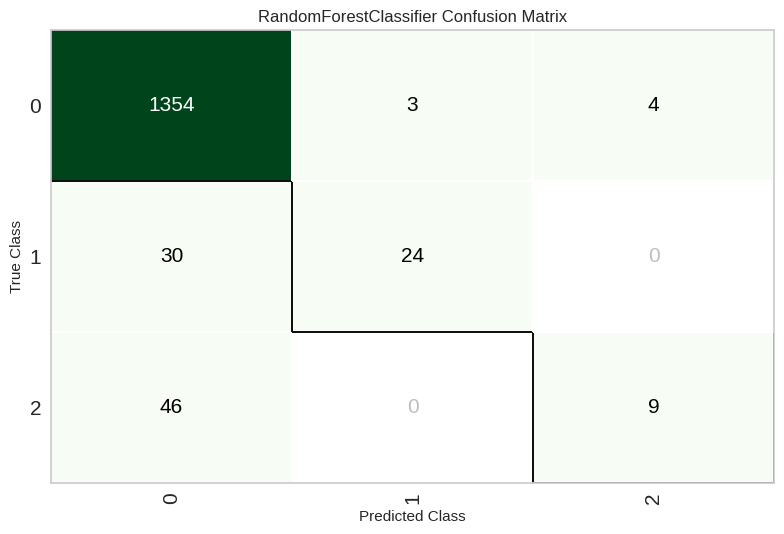

In [ ]:
# Evaluate the result of tuned model

plot_model(tuned_model, plot='confusion_matrix')


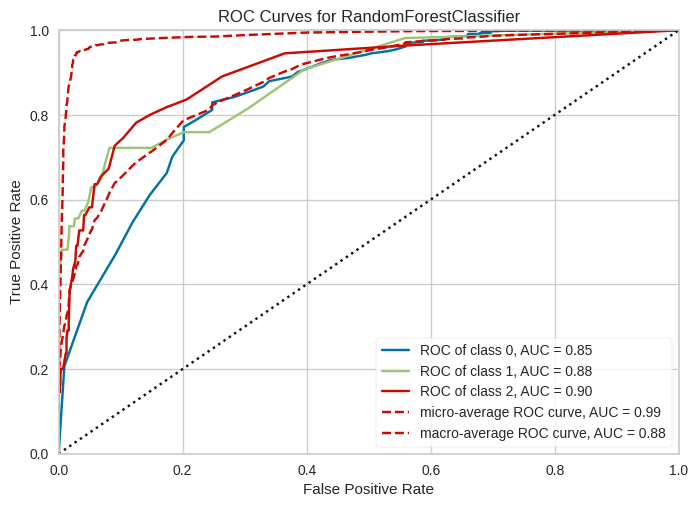

In [ ]:
# Ploting the AUC
plot_model(tuned_model, plot='auc')

In [ ]:
#Finalyzing and saving the model
final_model = finalize_model(tuned_model)

save_model(final_model, 'final_white_wine_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

**Testing the model**

In [ ]:
# load the model
loaded_model = load_model('final_white_wine_model')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
# Making a prediction on the data
prediction = predict_model(loaded_model, data=data)

prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,average,average,1.00
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,average,average,0.98
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,average,average,1.00
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,average,average,1.00
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,average,average,1.00
